# Vertical profile of WEP

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: viridisLite

## Read in data

In [ ]:
conc <- read_csv(here::here("./notebooks/P_concentration.csv")) %>%
  rename("conc" = "ak_content") %>%
  filter(timing == "Before") %>%
  mutate(sample_type = fct_recode(sample_type, "Ah" = "Soil")) %>%
  mutate(sample_type = fct_relevel(sample_type, c("Ah", "Organic", "Litter","Biomass"))) %>%
  mutate(location = fct_relevel(location, c("Upper", "Middle", "Lower")))


Rows: 1141 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): sample_type, timing, plot, location, treatment
dbl (3): site, ak_content, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 576 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): sample_type, timing, plot, location, treatment
dbl (3): site, dryweight, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 96 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): plot, location, sample_type, treatment
dbl (3): site, length_cm, bd

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Merge data

In [ ]:
total_data <- conc %>%
  left_join(mass_data) %>%
  left_join(bd_data) %>%
  mutate(p_total = case_when(sample_type == "Biomass" ~ conc * dryweight/1000 /0.25,
                             sample_type == "Litter" ~ conc * dryweight/1000 /0.25,
                             sample_type == "Organic" ~ conc *mass,
                             sample_type == "Ah"  ~ conc *mass)) %>%
  mutate(sample_type = fct_relevel(sample_type, c("Ah", "Organic", "Litter","Biomass"))) %>%
  mutate(location = fct_relevel(location, c("Upper", "Middle", "Lower")))


Joining with `by = join_by(sample_type, site, timing, plot, location, year,
treatment)`
Joining with `by = join_by(sample_type, site, plot, location, treatment)`

## Summary

In [ ]:
conc %>%
  group_by(sample_type) %>%
  summarise(mean = mean(conc, na.rm = T),
            median = median(conc, na.rm = T),
            sd = sd(conc, na.rm = T),
            IQR = quantile(conc, 0.75, na.rm = T) -quantile(conc, 0.25, na.rm = T))


# A tibble: 4 × 5
  sample_type  mean median     sd    IQR
  <fct>       <dbl>  <dbl>  <dbl>  <dbl>
1 Ah           1.12  0.953  0.651  0.785
2 Organic      3.99  3.40   2.54   2.38 
3 Litter      39.7  39.0   23.2   32.9  
4 Biomass     91.7  82.8   46.4   54.3  

`summarise()` has grouped output by 'sample_type'. You can override using the
`.groups` argument.

# A tibble: 12 × 6
# Groups:   sample_type [4]
   sample_type location    mean median     sd    IQR
   <fct>       <fct>      <dbl>  <dbl>  <dbl>  <dbl>
 1 Ah          Upper      1.38   1.24   0.803  0.901
 2 Ah          Middle     1.13   1.02   0.499  0.704
 3 Ah          Lower      0.864  0.726  0.507  0.387
 4 Organic     Upper      4.35   4.03   2.49   2.40 
 5 Organic     Middle     4.32   3.53   2.98   2.27 
 6 Organic     Lower      3.29   2.93   1.97   2.03 
 7 Litter      Upper     29.5   29.7   15.7   22.0  
 8 Litter      Middle    40.5   38.8   23.2   34.0  
 9 Litter      Lower     48.7   49.2   25.8   31.6  
10 Biomass     Upper     86.1   82.9   40.6   56.3  
11 Biomass     Middle    88.5   82.7   47.8   49.6  
12 Biomass     Lower    100.    82.6   49.8   63.6  

# A tibble: 4 × 5
  sample_type  mean median    sd   IQR
  <fct>       <dbl>  <dbl> <dbl> <dbl>
1 Ah           49.5   42.5  29.5  32.0
2 Organic      19.9   17.7  13.7  15.6
3 Litter       15.7   11.1  14.3  14.3
4 Biomass      31.9   26.3  23.5  23.3

`summarise()` has grouped output by 'sample_type'. You can override using the
`.groups` argument.

# A tibble: 12 × 6
# Groups:   sample_type [4]
   sample_type location  mean median    sd   IQR
   <fct>       <fct>    <dbl>  <dbl> <dbl> <dbl>
 1 Ah          Upper    64.5   57.7  35.8  41.5 
 2 Ah          Middle   49.0   44.6  21.5  26.0 
 3 Ah          Lower    35.1   28.9  21.4  18.3 
 4 Organic     Upper    23.1   22.1  13.1  17.1 
 5 Organic     Middle   19.2   17.8  12.6  10.4 
 6 Organic     Lower    17.4   12.8  14.8  11.8 
 7 Litter      Upper     8.75   6.66  7.50  8.25
 8 Litter      Middle   14.4    9.29 12.2  13.4 
 9 Litter      Lower    23.7   17.4  17.1  21.1 
10 Biomass     Upper    22.7   18.6  14.9  14.6 
11 Biomass     Middle   26.6   18.6  18.9  18.3 
12 Biomass     Lower    46.0   34.3  27.7  28.1 

## Plots

Bulk Density

In [ ]:
p5 <- ggplot(data = bd_data, aes(y = sample_type, x = bd, fill = location)) + 
  geom_boxplot() +
  theme_bw(base_size = 12) +
  labs(x = expression(paste("Bulk Density (", kg~m^{-3}, ")")), tag = "b)") +
  scale_fill_viridis_d(begin = 0.3, end = 1) +
  theme(legend.position = "bottom", 
        legend.title = element_blank(),
        axis.title.y = element_blank())


biomass and litter weights

In [ ]:
p4 <- ggplot(data = mass_data, aes(y = sample_type, x = dryweight/1000 /0.25, fill = location)) + 
  geom_boxplot() +
  theme_bw(base_size = 12) +
  labs(x = expression(paste("Mass (", kg~m^{-2}, ")")), y = "P Source", tag = "a)") +
  scale_fill_viridis_d(begin = 0.3, end = 1) +
  theme(legend.position = "bottom", 
        legend.title = element_blank())


In [ ]:
#| 
p4 + p5 + plot_layout(guides = 'collect') & theme(legend.position = 'bottom', legend.title = element_blank())


In [ ]:
p1 <- ggplot(data = conc, aes(y = sample_type, x = conc, fill = location)) + 
  geom_boxplot() + 
  #scale_x_log10() +
  theme_bw(base_size = 12) +
  theme(legend.position = c(0.2, 0.8),
        legend.title = element_blank()) +
  labs(x = expression(paste("WEP Concentration (", mg~kg^{-1}, ")")), y = "P Source", tag = "a)") +
  scale_fill_viridis_d(name = "Location", begin = 0.3, end = 1)


3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.

(`stat_boxplot()`).
Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).

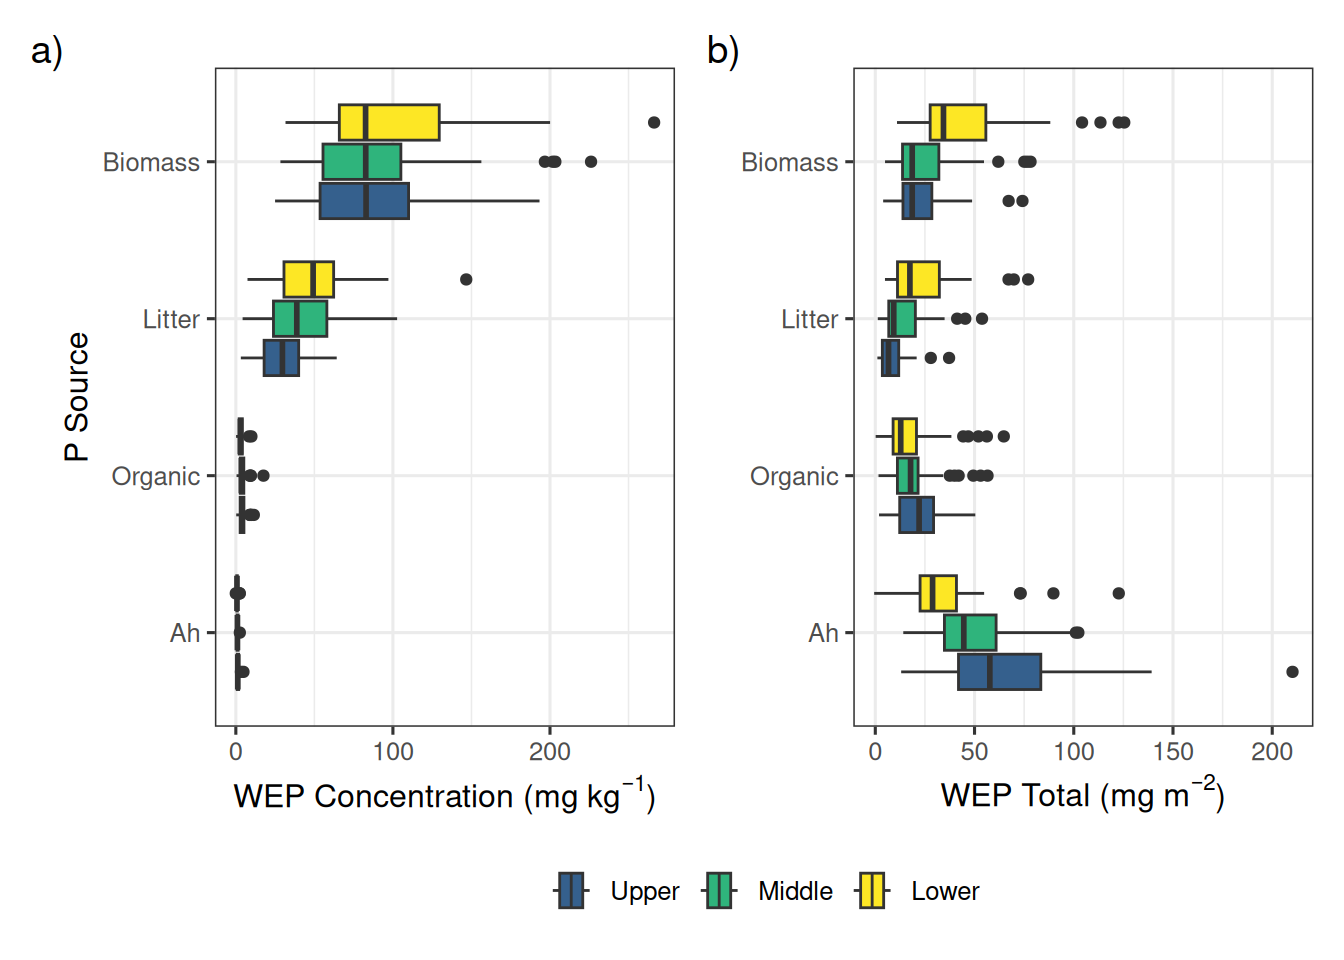

In [ ]:
#|  
p3 <- p1+p2 + plot_layout(guides = 'collect') & theme(legend.position = 'bottom', legend.title = element_blank())  

p3
